In [45]:
def plot_var(values,percent, theme):
    
    valid = {"classic", "dark", "modern"}
    if theme not in valid:
        raise ValueError("Theme is not valid. Valid themes are: classic,dark and modern" % valid)
    
    import matplotlib.pyplot as plt
    from src_functions import var_calc
    
   
    var_value = var_calc(values, percent)

    def plotting_func(theme):
        #VaR plot
        plt.style.use(theme)
        plt.hist(values,len(values))
        plt.axvline(var_value, color='red', linestyle='dashed', linewidth=2)
        plt.title("VaR")
    
    if theme == "classic":
        plotting_func("classic")
    elif theme == "dark":
        plotting_func("dark_background")
    elif theme == "modern":
        plotting_func("seaborn-whitegrid")

In [4]:
import pandas as pd

def get_SPreturns(csv_file):
   
    SP = pd.read_csv(csv_file)

    SPprice = []
    SPprice = SP["Price"].str.replace(',','')
    SPprice = SPprice.apply(float)
    returns = SPprice.pct_change()
    returns = returns.values
    returns = list(returns)
    returns.pop(0)
    return returns


returns = list(get_SPreturns("SPfile.csv"))

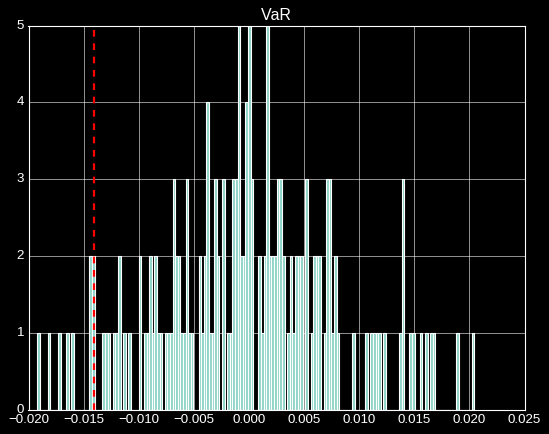

In [47]:
plot_var(returns, 0.05, "dark")

In [58]:
def plot_line(values, theme):
    
    valid = {"classic", "dark", "modern"}
    if theme not in valid:
        raise ValueError("Theme is not valid. Valid themes are: classic,dark and modern" % valid)
    
    import matplotlib.pyplot as plt
    
    def plotting_func(theme):
        #plot
        plt.style.use(theme)
        plt.plot(values, linewidth=2)
    
    if theme == "classic":
        plotting_func("classic")
    elif theme == "dark":
        plotting_func("dark_background")
    elif theme == "modern":
        plotting_func("seaborn-whitegrid")
    

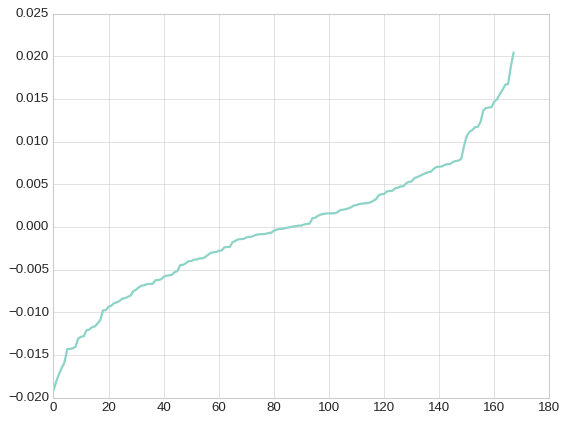

In [59]:
plot_line(returns, "modern")

In [68]:
def add_sd_bounds(values, theme):
    
    from src_functions import get_sd
    from src_functions import sd_bound_lower
    from src_functions import sd_bound_upper
    
    valid = {"classic", "dark", "modern"}
    if theme not in valid:
        raise ValueError("Theme is not valid. Valid themes are: classic,dark and modern" % valid)
    
    import matplotlib.pyplot as plt
    
    def plotting_func(theme):
        #plot
        plt.style.use(theme)
        plt.plot(values, linewidth=2)
        plt.plot(sd_bound_lower(values), linewidth=1, linestyle="--")
        plt.plot(sd_bound_upper(values), linewidth=1, linestyle="--")
    
    if theme == "classic":
        plotting_func("classic")
    elif theme == "dark":
        plotting_func("dark_background")
    elif theme == "modern":
        plotting_func("seaborn-whitegrid")

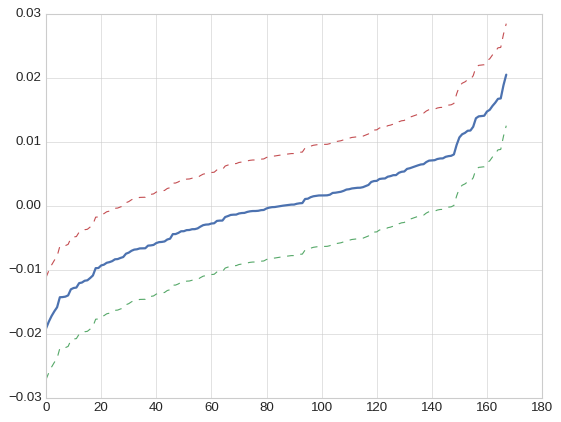

In [71]:
add_sd_bounds(returns, "modern")

In [104]:
def simulate(values, num_simul):
    
    from src_functions import get_mean
    from src_functions import get_sd
    from src_functions import monte_carlo
    import pandas as pd
    
    simulation_results = pd.DataFrame()
    for i in range(1, num_simul):
        array = monte_carlo(get_mean(values), get_sd(values), len(values))
        df = pd.DataFrame(array)
        simulation_results = pd.concat([simulation_results, df], axis =1)
    return simulation_results
    

In [105]:
simulate(returns, 50)

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.002972,0.002311,-0.001641,0.004182,0.002482,-0.010748,0.000326,-0.002627,-0.000203,-0.019337,...,-0.001226,-0.012229,-0.009173,-0.001111,0.017756,-0.005816,0.003723,0.004657,0.006806,-0.011259
1,-0.001005,-0.000590,-0.002559,-0.007282,0.008616,-0.007802,-0.009935,-0.011811,-0.003763,-0.018107,...,0.001892,0.003283,0.007745,-0.011897,0.004519,0.000564,-0.007415,-0.016218,-0.002212,0.003181
2,-0.002107,0.003509,0.006042,-0.003421,-0.007718,0.003036,0.002362,-0.005762,0.003442,-0.004575,...,0.002023,-0.011761,0.001297,0.012625,0.010917,-0.010384,-0.001174,0.011860,0.003083,0.000999
3,-0.004054,-0.001656,-0.003672,-0.001117,-0.011939,0.000935,0.002035,-0.001278,-0.001468,0.004052,...,-0.009672,0.001148,0.000598,-0.002893,0.007703,0.005345,-0.007371,-0.008897,-0.012461,-0.007125
4,0.009417,-0.003318,-0.001478,0.006044,0.003351,0.007560,-0.003423,0.011731,0.004230,0.009193,...,0.009604,-0.006824,-0.005909,-0.015726,-0.004744,-0.006675,-0.001037,0.010147,0.004886,-0.005099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.018074,-0.004778,-0.003597,0.005857,0.004902,-0.006650,-0.003345,0.011665,-0.015494,0.013519,...,-0.011364,-0.004630,0.007181,0.004926,0.003499,-0.002414,-0.010396,0.010647,-0.000165,0.006696
164,0.016969,-0.002931,0.005091,-0.001936,-0.015834,0.005400,0.008005,-0.009051,0.002849,0.000360,...,-0.000644,0.008269,0.007010,-0.007175,0.011289,-0.001508,0.003797,-0.005610,0.014747,0.002950
165,0.015638,0.002423,0.012410,0.000292,-0.011613,-0.002133,-0.004708,0.002356,-0.005003,-0.009439,...,-0.004196,0.012878,-0.000926,0.000291,-0.007805,-0.018090,-0.006432,0.013767,0.002191,-0.008029
166,-0.001566,0.001881,0.006481,0.002379,0.010765,-0.000904,0.003418,0.009947,0.010412,-0.005529,...,0.005018,0.009613,0.003377,0.007302,-0.003950,0.006501,0.000886,-0.003175,-0.010170,-0.004353


In [108]:
def plot_monte_carlo(values, num_simul, theme):
    
    simulations = simulate(values, num_simul)
    
    valid = {"classic", "dark", "modern"}
    if theme not in valid:
        raise ValueError("Theme is not valid. Valid themes are: classic,dark and modern" % valid)
    
    import matplotlib.pyplot as plt
    
    def plotting_func(theme):
        #plot
        plt.style.use(theme)
        simulations.plot.line(legend=False)
    
    if theme == "classic":
        plotting_func("classic")
    elif theme == "dark":
        plotting_func("dark_background")
    elif theme == "modern":
        plotting_func("seaborn-whitegrid")

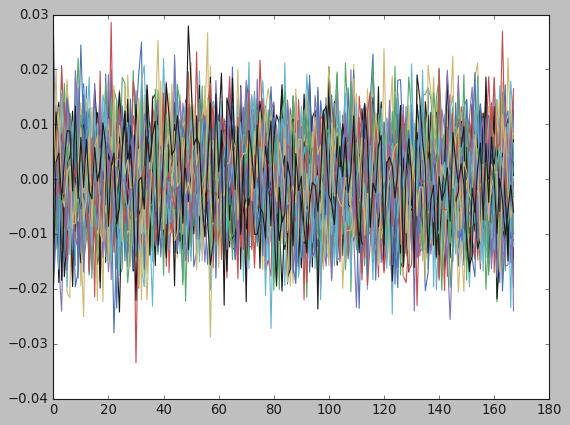

In [110]:
plot_monte_carlo(returns, 50, "classic")